In [48]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [49]:
mnist_base_path="/Users/zhouwencheng/Desktop/Grass/data/picture/mnist"
# 载入数据集
mnist = input_data.read_data_sets(mnist_base_path, one_hot=True)

Extracting ./data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [50]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 28*28])
x_flat = tf.reshape(x, shape=[-1, 28, 28, 1])
# x_sigmoid = tf.nn.sigmoid(x_flat)

In [51]:
### 编码器--压缩
conv1 = tf.layers.conv2d(x_flat, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x16
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# 当前shape: 14x14x16
conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x8
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# 当前shape: 7x7x8
conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x8
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# 当前shape: 4x4x8 

In [45]:
### 解码器--还原
upsample1 = tf.layers.conv2d_transpose(encoded, filters=8, kernel_size = (2, 2), strides=(2, 2))
# upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# 当前shape: 7x7x8 
conv4 = tf.layers.conv2d(upsample1, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 7x7x8
upsample2 = tf.layers.conv2d_transpose(conv4, filters=8, kernel_size = (2, 2), strides=(2, 2), padding='same')
# upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# 当前shape: 14x14x8
conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 14x14x8
upsample3 = tf.layers.conv2d_transpose(conv5, filters=8, kernel_size = (2, 2), strides=(2, 2), padding='same') 
upsample3 = tf.image.resize_nearest_neighbor(upsample3, (28,28))
# 当前shape: 28x28x8
conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
# 当前shape: 28x28x16 

logits = tf.layers.conv2d(conv6, 1, (3,3), padding='same', activation=None)
#当前shape: 28x28x1
decoded = tf.nn.sigmoid(logits, name='decoded')

In [46]:
#计算损失函数
# loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=x_flat, logits=logits)
# cost = tf.reduce_mean(loss)

cost = tf.reduce_mean(tf.pow(x_flat - logits, 2))

#使用adam优化器优化损失函数
opt = tf.train.AdamOptimizer(0.01).minimize(cost) 

BG
epoch: 1 loss: 0.112163
epoch: 1 loss: 0.08909871
epoch: 1 loss: 0.060145788
epoch: 1 loss: 0.049069807
epoch: 1 loss: 0.046576414
epoch: 1 loss: 0.041161958
epoch: 1 loss: 0.04294729
epoch: 1 loss: 0.03570249
epoch: 1 loss: 0.031029558
epoch: 1 loss: 0.030553766
epoch: 1 loss: 0.02877097
epoch: 1 loss: 0.026452683
epoch: 1 loss: 0.025604414
epoch: 1 loss: 0.023755053
epoch: 1 loss: 0.025881423
epoch: 1 loss: 0.023977634
epoch: 1 loss: 0.022702241
epoch: 1 loss: 0.024593864
epoch: 1 loss: 0.021935824
epoch: 1 loss: 0.021343537
epoch: 1 loss: 0.021322843
epoch: 1 loss: 0.020415531
epoch: 1 loss: 0.019913157
epoch: 1 loss: 0.021427037
epoch: 1 loss: 0.019904956
epoch: 1 loss: 0.019990029
epoch: 1 loss: 0.019694429
epoch: 1 loss: 0.019456267
epoch: 2 loss: 0.019147402
epoch: 2 loss: 0.019458262
epoch: 2 loss: 0.0182248
epoch: 2 loss: 0.01906684
epoch: 2 loss: 0.018485649
epoch: 2 loss: 0.01875998
epoch: 2 loss: 0.018361997
epoch: 2 loss: 0.017740155
epoch: 2 loss: 0.01735845
epoch: 2 l

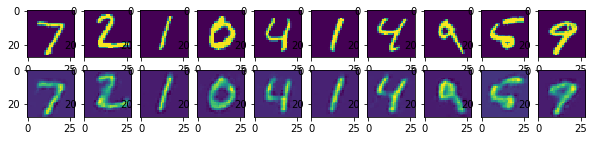

In [47]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 2
batch_size = 200

# 

print("BG")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for index in range(mnist.train.num_examples//batch_size):
            x_train, y_train = mnist.train.next_batch(batch_size)  
            batch_cost, _ = sess.run([cost, opt], feed_dict={x:x_train}) 
            if index%10 == 0:
                print("epoch:", e+1, "loss:", batch_cost)
                
    # # Applying encode and decode over test set
    encode_decode = sess.run(
        logits, feed_dict={x: mnist.test.images[:10]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()

In [ ]:
epoch: 1 loss: 0.1087607
epoch: 1 loss: 0.072575115
epoch: 1 loss: 0.05642284
epoch: 1 loss: 0.052200988
epoch: 1 loss: 0.04876927
epoch: 1 loss: 0.045521647
epoch: 1 loss: 0.046306472
epoch: 1 loss: 0.040698987
epoch: 1 loss: 0.03885592
epoch: 1 loss: 0.035536744
epoch: 1 loss: 0.035556816
epoch: 1 loss: 0.033164207
epoch: 1 loss: 0.03465525
epoch: 1 loss: 0.032272946
epoch: 1 loss: 0.030801348
epoch: 1 loss: 0.029387556
epoch: 1 loss: 0.030222684
epoch: 1 loss: 0.030226678
epoch: 1 loss: 0.029042216
epoch: 1 loss: 0.029036822
epoch: 1 loss: 0.02896723
epoch: 1 loss: 0.027694233
epoch: 1 loss: 0.028192943
epoch: 1 loss: 0.027843585
epoch: 1 loss: 0.026969595
epoch: 1 loss: 0.027943185
epoch: 1 loss: 0.028177634
epoch: 1 loss: 0.026794521
epoch: 2 loss: 0.025567483
epoch: 2 loss: 0.027915899